# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")


Number of cities in the list: 584


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f'{url}appid={weather_api_key}&q={city}&units=metric'
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | grytviken
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | diglur
Processing Record 4 of Set 1 | jamestown
Processing Record 5 of Set 1 | aykhal
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | tazovsky
Processing Record 8 of Set 1 | port-aux-francais
Processing Record 9 of Set 1 | severnoye
Processing Record 10 of Set 1 | puerto natales
Processing Record 11 of Set 1 | malinyi
Processing Record 12 of Set 1 | waitangi
Processing Record 13 of Set 1 | flying fish cove
Processing Record 14 of Set 1 | hamilton
Processing Record 15 of Set 1 | al jawf
Processing Record 16 of Set 1 | lubango
Processing Record 17 of Set 1 | buka
Processing Record 18 of Set 1 | weno
Processing Record 19 of Set 1 | isla del bosque
Processing Record 20 of Set 1 | adamstown
Processing Record 21 of Set 1 | albany
Processing Record 22 of Set 1 | tukrah
Processing Record 23 of Set 1 | wimp

Processing Record 38 of Set 4 | fortaleza
Processing Record 39 of Set 4 | west island
Processing Record 40 of Set 4 | wotho
Processing Record 41 of Set 4 | kalnibolotskaya
Processing Record 42 of Set 4 | yaren
Processing Record 43 of Set 4 | dingras
Processing Record 44 of Set 4 | ipameri
Processing Record 45 of Set 4 | belmonte
Processing Record 46 of Set 4 | bar
Processing Record 47 of Set 4 | san antonio del tachira
Processing Record 48 of Set 4 | kirakira
Processing Record 49 of Set 4 | hundested
Processing Record 0 of Set 5 | lata
Processing Record 1 of Set 5 | tarfaya
Processing Record 2 of Set 5 | vila franca do campo
Processing Record 3 of Set 5 | haiku-pauwela
Processing Record 4 of Set 5 | punta arenas
Processing Record 5 of Set 5 | susuman
Processing Record 6 of Set 5 | ta`u
Processing Record 7 of Set 5 | talnakh
Processing Record 8 of Set 5 | lekki
City not found. Skipping...
Processing Record 9 of Set 5 | carutapera
Processing Record 10 of Set 5 | jerseyville
Processing Re

Processing Record 30 of Set 8 | nabire
Processing Record 31 of Set 8 | eureka
Processing Record 32 of Set 8 | acapulco de juarez
Processing Record 33 of Set 8 | paita
Processing Record 34 of Set 8 | luwuk
Processing Record 35 of Set 8 | muisne
Processing Record 36 of Set 8 | salalah
Processing Record 37 of Set 8 | sao joao do paraiso
Processing Record 38 of Set 8 | ciudad bolivar
Processing Record 39 of Set 8 | labytnangi
Processing Record 40 of Set 8 | san vicente
Processing Record 41 of Set 8 | margate
Processing Record 42 of Set 8 | mae hong son
Processing Record 43 of Set 8 | leongatha
Processing Record 44 of Set 8 | cole harbour
Processing Record 45 of Set 8 | safaga
Processing Record 46 of Set 8 | krasnoslobodsk
Processing Record 47 of Set 8 | harsin
Processing Record 48 of Set 8 | prado
Processing Record 49 of Set 8 | cill airne
Processing Record 0 of Set 9 | uturoa
Processing Record 1 of Set 9 | placido de castro
Processing Record 2 of Set 9 | dazhou
Processing Record 3 of Set 

Processing Record 23 of Set 12 | antsiranana
Processing Record 24 of Set 12 | anaco
Processing Record 25 of Set 12 | dryden
Processing Record 26 of Set 12 | turpan
Processing Record 27 of Set 12 | mata-utu
Processing Record 28 of Set 12 | longboat key
Processing Record 29 of Set 12 | road town
Processing Record 30 of Set 12 | beau vallon
Processing Record 31 of Set 12 | berezovyy
Processing Record 32 of Set 12 | nizhneudinsk
Processing Record 33 of Set 12 | tindouf
-----------------------------
Data Retrieval Complete      
-----------------------------


In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          565
Lat           565
Lng           565
Max Temp      565
Humidity      565
Cloudiness    565
Wind Speed    565
Country       565
Date          565
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,grytviken,-54.2811,-36.5092,2.09,66,26,5.77,GS,1701703582
1,bethel,41.3712,-73.4140,9.75,74,0,2.57,US,1701703332
2,diglur,18.5500,77.6000,22.62,70,100,2.79,IN,1701703582
3,jamestown,42.0970,-79.2353,3.90,91,100,6.69,US,1701703582
4,aykhal,66.0000,111.5000,-35.45,99,100,2.61,RU,1701703583


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.09,66,26,5.77,GS,1701703582
1,bethel,41.3712,-73.4140,9.75,74,0,2.57,US,1701703332
2,diglur,18.5500,77.6000,22.62,70,100,2.79,IN,1701703582
3,jamestown,42.0970,-79.2353,3.90,91,100,6.69,US,1701703582
4,aykhal,66.0000,111.5000,-35.45,99,100,2.61,RU,1701703583


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

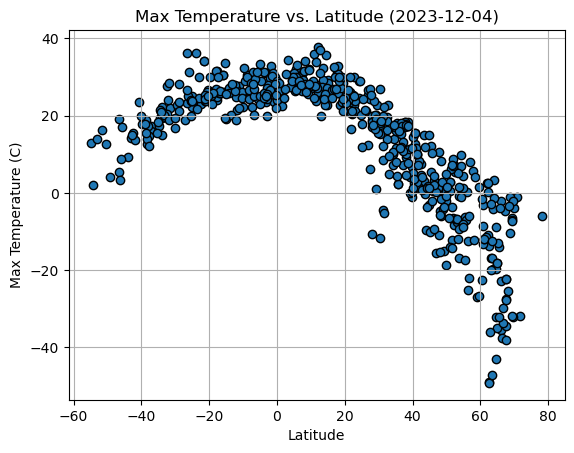

In [8]:
# Build scatter plot for latitude vs. temperature
lat_scatter = city_data_df['Lat']
temp_scatter = city_data_df['Max Temp']
lat_temp_scatter = plt.scatter(lat_scatter, temp_scatter, edgecolors='black',linewidth=1)

# Incorporate the other graph properties
import datetime
unix_time = city_data_df['Date'].median()
time_converting = datetime.datetime.fromtimestamp(unix_time)
figure_date = time_converting.strftime('%Y-%m-%d')
title = f'Max Temperature vs. Latitude ({figure_date})'

plt.title(title) 
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

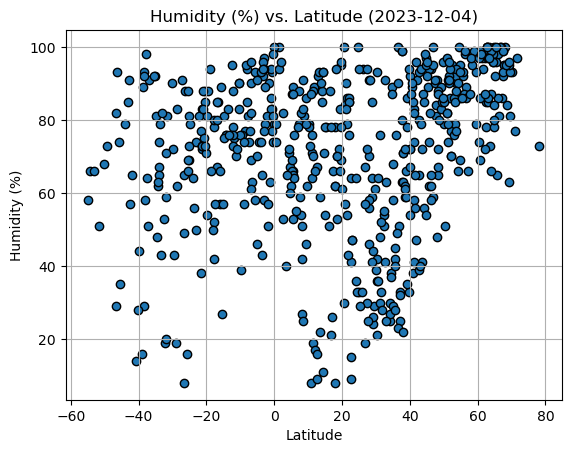

In [9]:
# Build the scatter plots for latitude vs. humidity
humidity_scatter = city_data_df['Humidity']
lat_humidity_scatter = plt.scatter(lat_scatter, humidity_scatter, edgecolors='black',linewidth=1)

# Incorporate the other graph properties
title = f'Humidity (%) vs. Latitude ({figure_date})'

plt.title(title) 
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

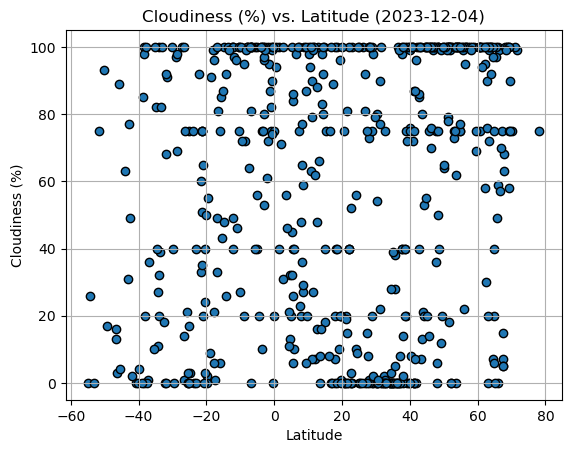

In [10]:
# Build the scatter plots for latitude vs. cloudiness
cloudiness_scatter = city_data_df['Cloudiness']
lat_cloud_scatter = plt.scatter(lat_scatter, cloudiness_scatter, edgecolors='black',linewidth=1)

# Incorporate the other graph properties
title = f'Cloudiness (%) vs. Latitude ({figure_date})'

plt.title(title) 
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

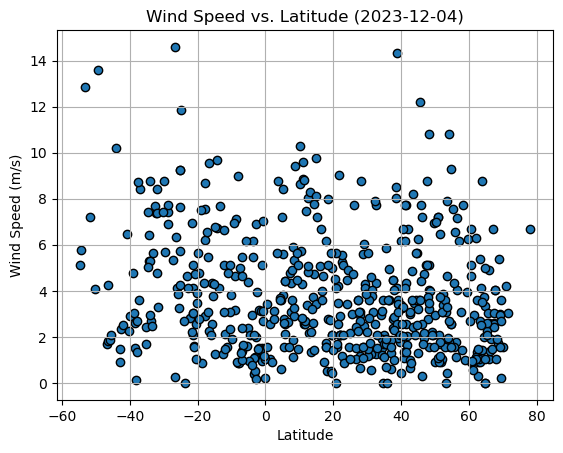

In [11]:
# Build the scatter plots for latitude vs. wind speed
wind_scatter = city_data_df['Wind Speed']
lat_wind_scatter = plt.scatter(lat_scatter, wind_scatter, edgecolors='black',linewidth=1)

# Incorporate the other graph properties

title = f'Wind Speed vs. Latitude ({figure_date})'

plt.title(title) 
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [23]:
# Define a function to create Linear Regression plots
def lin_reg(x,y):
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x,y)
    regress_value = x * slope + intercept
    line_eq = f'y = {round(slope,2)}x + {round(intercept,2)}'
    yplacement = y.max()-((y.max()-y.min())/10)
    xplacement = x.min()+((x.max()-x.min())/10)
    return plt.scatter(x,y,alpha=0.5),plt.plot(x, regress_value, "r-"), plt.annotate(line_eq, (xplacement,yplacement), fontsize=12, color='red', weight='bold'), print(f'The r-value is: {rvalue}')
    

In [24]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df.loc[city_data_df['Lat'] >= 0, :]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,bethel,41.3712,-73.4140,9.75,74,0,2.57,US,1701703332
2,diglur,18.5500,77.6000,22.62,70,100,2.79,IN,1701703582
3,jamestown,42.0970,-79.2353,3.90,91,100,6.69,US,1701703582
4,aykhal,66.0000,111.5000,-35.45,99,100,2.61,RU,1701703583
6,tazovsky,67.4667,78.7000,-34.54,99,7,2.60,RU,1701703583


In [25]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df.loc[city_data_df['Lat'] <0, :]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,grytviken,-54.2811,-36.5092,2.09,66,26,5.77,GS,1701703582
5,avarua,-21.2078,-159.7750,24.03,83,75,2.06,CK,1701703583
7,port-aux-francais,-49.3500,70.2167,4.14,73,17,13.58,TF,1701703583
9,puerto natales,-51.7236,-72.4875,16.25,51,75,7.20,CL,1701703583
10,malinyi,-8.9333,36.1333,30.37,57,95,3.17,TZ,1701703584


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8761947606089764


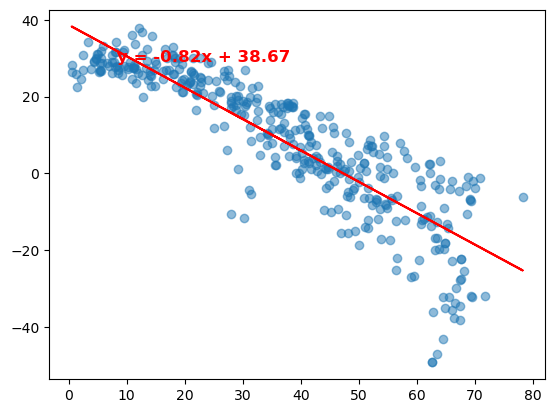

In [26]:
# Linear regression on Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'])
plt.show()

The r-value is: 0.7133597306736316


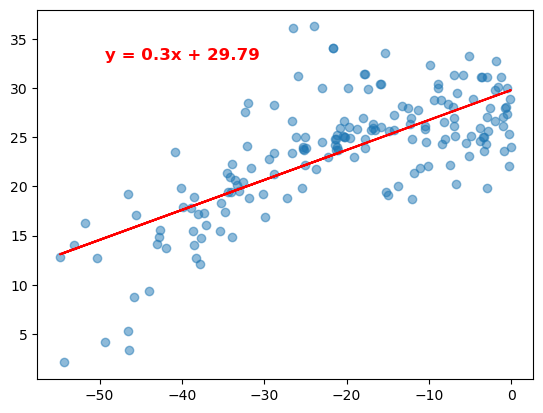

In [27]:
# Linear regression on Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'])
plt.show()

**Discussion about the linear relationship:**   
For the Northern Hemisphere, the high 'r' value indicates a strong negative correlation of Max Temperatures and Latitude. As the datapoints move north from the equator, max temperatures reduce.
The 'r' value for the Southern Hemisphere has a moderate positive correlation of Max Temperature and Latitude.  As the datapoints move south from the equator, max tempartures reduce.
There are linear correlations of max tempertures and latitudes after separting datapoints above and below the equator.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.4021518298938372


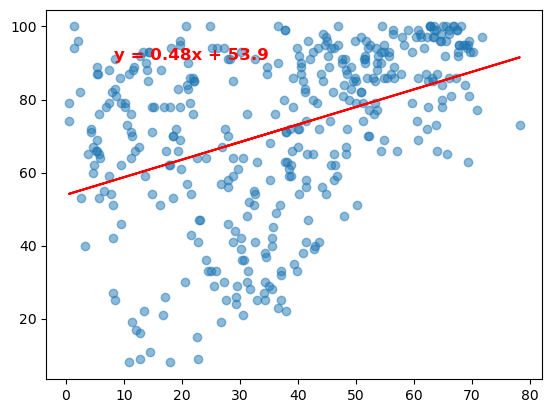

In [28]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Humidity'])
plt.show()

The r-value is: 0.30967792478197864


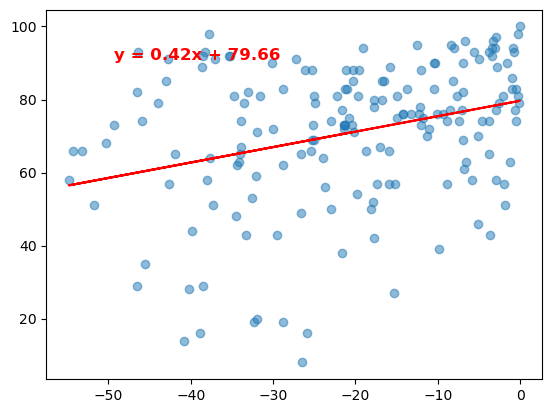

In [29]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Humidity'])
plt.show()

**Discussion about the linear relationship:**  
The 'r' values for both the Northern and Southern Hemisphere, when comparing Latitude and Humidity, are less than 0.3. This indicates no or a very weak correlation of Latitude and Humidity.  Latitude and Humidity do not appear to have a linear relationship.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2554610957846743


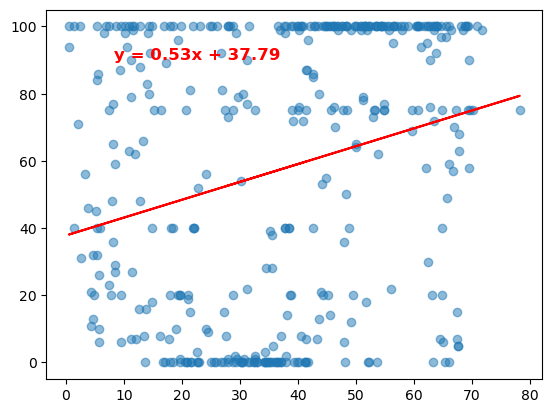

In [30]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'])
plt.show()

The r-value is: 0.40891177362405934


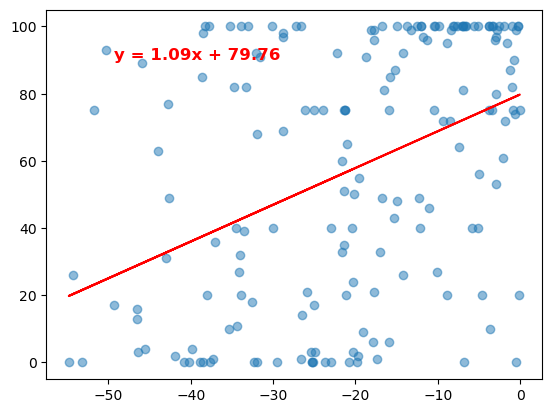

In [31]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'])
plt.show()

**Discussion about the linear relationship:**  
The 'r' values for both the Northern and Southern Hemisphere, when comparing Latitude and Cloudiness, are less than 0.3. This indicates no or a very weak correlation of Latitude and Cloudiness. Latitude and Cloudiness do not appear to have a linear relationship. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.1281959719250226


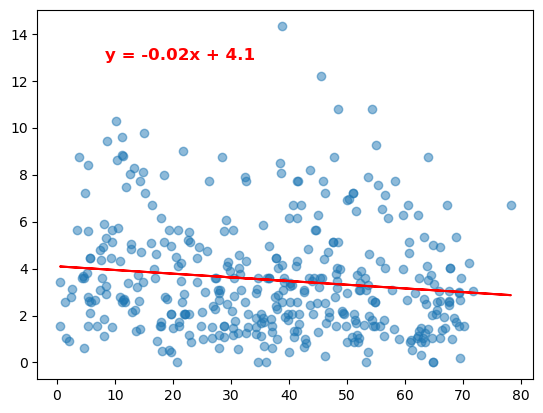

In [32]:
# Northern Hemisphere
lin_reg(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'])
plt.show()

The r-value is: -0.2970174304579795


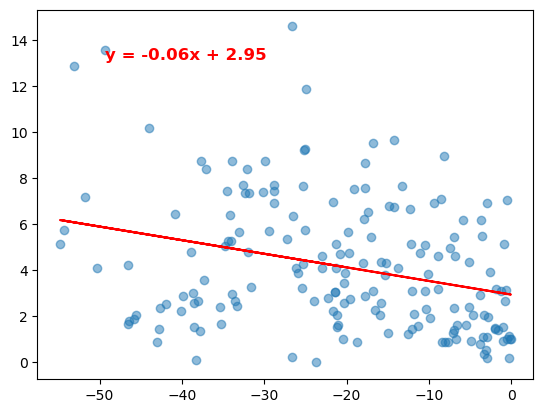

In [33]:
# Southern Hemisphere
lin_reg(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'])
plt.show()

**Discussion about the linear relationship:**  
The 'r' values for both the Northern and Southern Hemisphere, when comparing Latitude and Wind Speed, are less than 0.3. This indicates no or a very weak correlation of Latitude and Wind Speed.  Latitude and Wind Speed do not appear to have a linear relationship. 